# Problem Set 3, due May 9th at 3:30pm.

### Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python!

*Also note:* For this assignment we are requiring you to use base **matplotlib** - no more Seaborn or other packages. This will help you become familiar with techniques for maintaining fine-grained control over your data visualizations. It will also help our graders, who spent countless hours trying to make various versions import for grading.

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
import math

In [3]:
plt.rcParams["axes.labelsize"] = 12

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).  Please read about the dataset carefully before continuing.  Use the following commands to load the dataset and print some descriptive information


In [4]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [5]:
print bdata.keys()
print bdata.feature_names
print bdata.data.shape
print bdata.target.shape
# uncomment the following if you want to see a lengthy description of the dataset
# print bdata.DESCR

['data', 'feature_names', 'DESCR', 'target']
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506L, 13L)
(506L,)


---

## Part 1: Descriptive analysis

The goal of this section is to explore the data and make a few nice
visualizations -- before beginning the "real" work, we should dig into
the data a bit do see what we are dealing with.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.
  

### 1.1: Histogram of housing prices

Your first task is to make a histogram of 'MEDV' (the median hose
                                                  value, your target
                                                  variable), and make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


In [6]:
%matplotlib inline

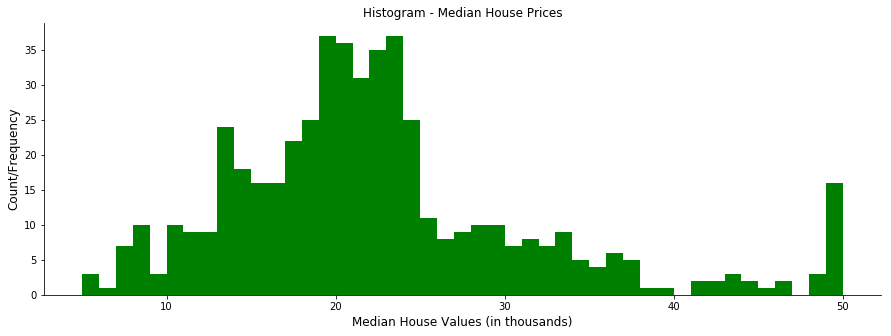

In [7]:
#Plot with $1000 bin width
fig,ax= plt.subplots(nrows=1)
ax.hist(bdata.target, bins=45, color='green')
fig.set_size_inches(15,5)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Lables
ax.set_title('Histogram - Median House Prices')
ax.set_xlabel('Median House Values (in thousands)')
ax.set_ylabel('Count/Frequency')

### 1.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship
between the median value of the home (y-axis) and the per-capita crime
rate (x-axis).  Properly label your axes, and make sure that your
graphic looks polished and professional.  


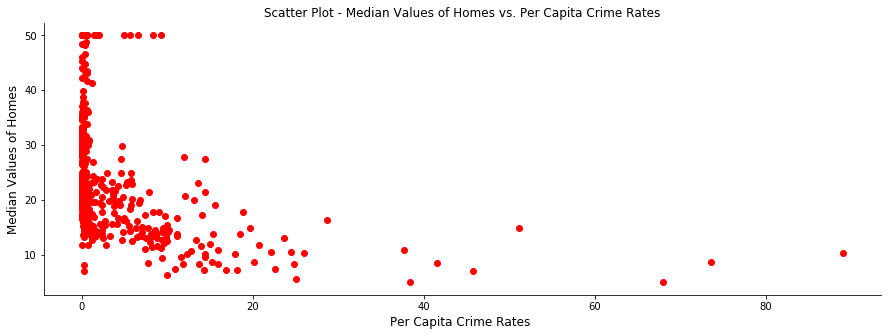

In [8]:
#Plot
fig,ax= plt.subplots(nrows=1)
fig.set_size_inches(15,5)
ax.scatter(bdata.data[:,0],bdata.target, color='red')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Lables
ax.set_title('Scatter Plot - Median Values of Homes vs. Per Capita Crime Rates')
ax.set_xlabel('Per Capita Crime Rates ')
ax.set_ylabel('Median Values of Homes')

### 1.3 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  

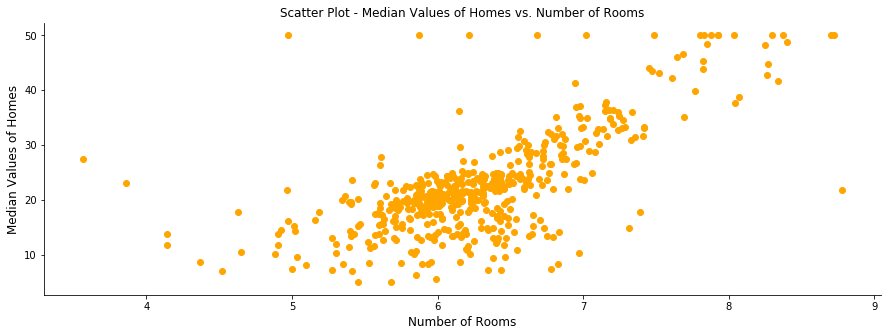

In [9]:
#Plot
fig,ax= plt.subplots(nrows=1)
fig.set_size_inches(15,5)
ax.scatter(bdata.data[:,5],bdata.target, color='orange')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Lables
ax.set_title('Scatter Plot - Median Values of Homes vs. Number of Rooms')
ax.set_xlabel('Number of Rooms')
ax.set_ylabel('Median Values of Homes')

---

## Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

### 2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. 
Details of RMSE can be found in Hastie, Tibishrani, Friedman _The
Elements of Statistical Learning_, Ch 2.5.  (Available on the web)



In [10]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print compute_rmse((2,2,3),(0,2,6)
2.08
"""

def compute_rmse(predictions,y_values):
    sq_error = (predictions - y_values)**2
    sum_sq_error = sq_error.sum()
    rmse = math.sqrt(sum_sq_error/float(len(predictions)))
    return rmse

### 2.2 Divide your data into training and testing datasets


Randomly select 66% of the data and put this in a training dataset
(call this "bdata_train"), and place the remaining 34% in a testing
dataset (call this "bdata_test").  Please us 'np.random' for random numbers.


In [11]:
#Adding the target column into the boston data
bdata_with_target= np.insert(bdata.data, bdata.data.shape[1],bdata.target, axis = 1)

#Setting the seed and randomly shuffling the data
np.random.seed(seed=13579)
random_bdata = np.random.shuffle(bdata_with_target)


#Slicing 66% of the random data for training set and 34% for test set.
train_row_num = int(math.ceil(0.66*len(bdata_with_target)))


#Splitting the data
bdata_train = bdata_with_target[0:train_row_num,:]
bdata_test = bdata_with_target[train_row_num:len(bdata_with_target),:]

### 2.3 Use a trivial baseline model for prediction, and compute RMSE
Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

In [12]:
#Creating a function to compute RMSEs on the baseline prediction model

#Predicted values for training will be the mean of the training_Set's target
pred_training = bdata_train[:,13].mean()
    
#Using the training model for predicting values for test data too
pred_test = bdata_train[:,13].mean()
    
#Calculate RMSE on both training and test sets
rmse_training = compute_rmse(bdata_train[:,13], pred_training)
rmse_test = compute_rmse(bdata_test[:,13], pred_test)

#Store the Results in a Dataframe
results_df = pd.DataFrame([{"pred_training":pred_training, 
                            'pred_test':pred_test,
                            'rmse_test': rmse_test,
                            'rmse_training': rmse_training,}])
results_df

,pred_test,pred_training,rmse_test,rmse_training
0,22.045808,22.045808,10.309262,8.574434


As we can see from the above results, the rmse for test set is more than the training set. This is definitely as expected, as we used the training mean as our prediction model. The rmse is therefore naturally more for a different dataset. 

##Part 3: Nearest Neighbors


### 3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average
Value" baseline that you computed above.  Soon you will implement the
Nearest Neighbor algorithm, but first you need to create a distance
metric to measure the distance (and similarity) between two instances.
Write a generic function to compute the Lp-Norm distance. Verify that
your function works by computing the L-2 (Euclidean) distance and L-1 (Manhattan) distance between the points (3,4) and (6,8), and between (6,8) and (3,4).  Ensure that your distance is correct and positive in both cases!


In [13]:
def distance(x,y,l):
    #Converting Distance to numpy arrays
    x = np.asarray(x)
    y = np.asarray(y)
    
    #Computing Euclidean Distance
    if(l==1):
        dist = (x-y)**2
        sum_sq = np.sum(dist, axis=1)
        return np.asarray(np.sqrt(sum_sq))
    elif(l==2):
        dist = np.absolute(x-y)
        sum_sq = np.sum(dist, axis=1)
        return np.asarray(np.sqrt(sum_sq))
    else:
        return "l should be either 1 or 2"

### 3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as
you know, with Nearest Neighbors there is no real training, you just
need to keep your training data in memory.  Write a function that
predicts, for each instance in the testing data (bdata_test), the
median home value using the nearest neighbor algorithm we discussed in
class.  Since this is a small dataset, you can simply compare your
test instance to every instance in the training set, and return the
MEDV value of the closest training instance.  You can just loop over
the instances to find the nearest neighbor.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

Plot the true vs predicted price for your test data


In [14]:
"""
# Function : knn_basic
Input: 
test: Test Dataset, 
train: Training Dataset,
feature_indices: Feature_Indices in the dataset, 
target_index: target_index in the dataset, 
L: 1 or 2 for Euclidean or Manahattan Distance
----------------------------------------------
Output: A tuple of Predictions and RMSE
Predictions: A numpy array of predicted values
RMSE: RMSE of the basic knn model
"""
import time
def knn_basic(test, train,feature_indices,target_index, L,k):
    start_time = time.time()
    #Empty lists
    eucd_dist=[]
    min_dist_idx = []
    predictions =[]
    
    for i in range(len(test)):     
        #Euclidean distance between test instance and all training_samples
        eucd_dist.append(distance(train[:,feature_indices],test[i,feature_indices],L))
        #Find out the index of the minimum distance
        min_dist_idx.append(np.argmin(np.asarray(eucd_dist[i])))
        #Prediction
        predictions.append(train[min_dist_idx[i],target_index])
        
    #Calculate RMSE
    rmse = compute_rmse(predictions,test[:,target_index])
    
    print 'Time Taken is : ' + str(time.time() - start_time)
        
    return (predictions, rmse)

In [15]:
#Calling the Basic KNN function for RMSE
rmse = knn_basic(bdata_test, bdata_train, [0,5],[13],1,1)[1]

Time Taken is : 0.0189998149872


In [16]:
rmse

7.401720415976212

Time Taken is : 0.0189998149872


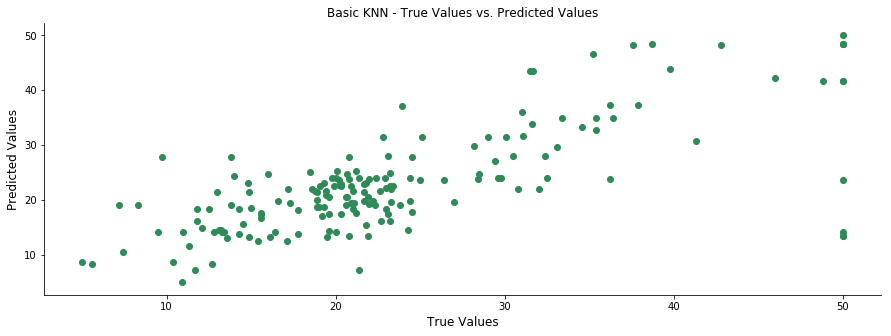

In [17]:
#Plotting the true vs. predicted values for Basic KNN
predicted_values = knn_basic(bdata_test, bdata_train, [0,5],[13],1,1)[0]

fig,ax= plt.subplots(nrows=1)
fig.set_size_inches(15,5)

ax.scatter(bdata_test[:,13],predicted_values, color='seagreen')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Lables
ax.set_title('Basic KNN - True Values vs. Predicted Values')
ax.set_xlabel('True Values')
ax.set_ylabel('Predicted Values')

### 3.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Normalization is similar to Mahalanobis disctance (if the features are independent).  Read more in Daume (2017), _A Course in Machine Learning_ Chapter 4.3.  Write a simple generic normalization function that takes as input an array of values for a given feature, and returns the normalized array.  Do it well, you will need it in the future as well ;-)

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

In [18]:
"""
# Function : normalize
Input: 
data - any dataset,
feature_indices: Feature_Indices in the dataset, 
target_index: target_index in the dataset, 
L: 1 or 2 for Euclidean or Manahattan Distance
----------------------------------------------
Output: Normalized Data - Subtracted with mean and divided by Standard Deviation

"""
def normalize(data, feature_indices,target_index):
    
    #Empty Lists
    mean_data = []
    std_data = []

    #Find the mean and std_deviation of our data features
    for feature in feature_indices:
        mean_data.append(np.mean(data[:,feature]))
        std_data.append(np.std(data[:,feature]))
    
    #Normalize
    normalized_data = np.asarray((data[:,feature_indices]- mean_data)/std_data)
    target = np.vstack(np.asarray(data[:,target_index]))
    
    #Stacking the normalized features and target together
    normal_data = np.hstack((normalized_data,target))
    
    return (normal_data)


In [19]:
#Normalizing features CRIM and RM for training set
normal_train = normalize(bdata_train,[0,5],13)

#Normalizing features CRIM and RM for test set
normal_test = normalize(bdata_test,[0,5],13)

#Computing RMSE for the normalized data based on Euclidean distance
knn_basic(normal_test, normal_train, [0,1],[2],2,1)[1]

Time Taken is : 0.0120000839233


7.008031107236897

As we can see, the RMSE we obtain after normalizing the features is lower than we get without normalizing. Also, the calculation is much faster after normalizing features. This works the best when we have large datasets.

### 3.4 Optimization


A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!  

What combination of features and distance function provide the lowest RMSE?  Compre RMSEs with the corresponding true-predicted plots.

Do your decisions affect the running time of the algorithm?

In [20]:
'''
6 - AGE      proportion of owner-occupied units built prior to 1940
11 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
9 - TAX      full-value property-tax rate per $10,000
3 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5 - NOX      nitric oxides concentration (parts per 10 million)
'''

#Empty Results Set
results ={}

#1.Trying Age and NOX features with house prices (L-1)
normal_age_nox_test = normalize(bdata_test,[4,6],13)
normal_age_nox_train = normalize(bdata_train,[4,6],13)
results[('age_nox', 1)] = knn_basic(normal_age_nox_test, normal_age_nox_train, [0,1],[2],1,1)[1]

#2.Trying CHAS,TAX,NOX features with house prices (L-1)
normal_chas_tax_nox_test = normalize(bdata_test,[3,9,5],13)
normal_chas_tax_nox_train = normalize(bdata_train,[3,9,5],13)
results[('chas_tax_nox', 1)] = knn_basic(normal_chas_tax_nox_test, normal_chas_tax_nox_train, [0,1,2],[3],1,1)[1]

#3.Trying B and CHAS features with house prices (L-2)
normal_b_chas_test = normalize(bdata_test,[11,3],13)
normal_b_chas_train = normalize(bdata_train,[11,3],13)
results[('b_chas_nox', 2)] = knn_basic(normal_b_chas_test, normal_b_chas_train, [0,1],[2],2,1)[1]

#4.Trying Tax and Age features with L-1
normal_age_tax_test = normalize(bdata_test,[6,9],13)
normal_age_tax_train = normalize(bdata_train,[6,9],13)
results[('age_tax', 1)] = knn_basic(normal_age_tax_test, normal_age_tax_train, [0,1],[2],1,1)[1]


#5.Trying LSTAT and Age features with L-1
normal_age_lstat_test = normalize(bdata_test,[6,12],13)
normal_age_lstat_train = normalize(bdata_train,[6,12],13)
results[('age_lstat', 1)] = knn_basic(normal_age_lstat_test, normal_age_lstat_train, [0,1],[2],1,1)[1]

#6.Trying  features LSTAT,CRIM, RM, AGE  (12,0,5,6,9 with L-2
normal_lcrma_test = normalize(bdata_test,[0,5,6,9,12],13)
normal_lcrma_train = normalize(bdata_train,[0,5,6,9,12],13)
results[('lstat_crim_rm_age_tax', 2)] = knn_basic(normal_lcrma_test, normal_lcrma_train, [0,1,2,3,4],[5],2,1)[1]

Time Taken is : 0.0209999084473
Time Taken is : 0.0220000743866
Time Taken is : 0.0140001773834
Time Taken is : 0.0170001983643
Time Taken is : 0.0190000534058
Time Taken is : 0.029000043869


In [21]:
#Results
import pandas as pd
results_df = pd.DataFrame.from_dict(results, orient='index').reset_index()
results_df.columns=['Features,L', 'RMSE']
results_df

,"Features,L",RMSE
0,"(age_nox, 1)",12.261385
1,"(b_chas_nox, 2)",12.510812
2,"(age_lstat, 1)",7.829380
3,"(lstat_crim_rm_age_tax, 2)",6.179241
4,"(age_tax, 1)",11.298814
5,"(chas_tax_nox, 1)",7.096118


The combination of features like lower status of the population, per capita crime rate, age of the house, size of the house and full-value property-tax rate with L=2, gives the lowest RMSE of 6.12.

The decisions certainly affect the running time of the algorithm. As we increase the number of features, the running time increases. 

### 3.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see Daume (2017) _A Course in Machine Learning_, Ch 4.6).  Here you must implement a simple k-fold cross-validation algorithm yourself.  Essentially you have to partition your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in K-fold iterator -- do *not* use that here.)

Use Euclidean distance with CRIM and RM (0 and 5) as features.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations, and the total running time for all 10 iterations.  Compare the k-fold RMSE with the training-testing split RMSE above for the same hyperparameter values.

In [22]:
 """
# Function : cross_validation
Input: 
data - any dataset,
folds: Number of folds
feature_indices: Feature_Indices in the dataset, 
target_index: target_index in the dataset, 
L: 1 or 2 for Euclidean or Manahattan Distance
k: k for finding k nearest neighbors
function: knn_basic(k=1) or knn
----------------------------------------------
Output: result - Average RMSE of {folds} cross validation and Time Taken

"""
    
def cross_validation(data,folds,feature_indices,target_index,L,k,function):
    start_time = time.time()
    #Slicing the random data into 10 folds.
    #fold_size = int(len(data) / folds)
    
    #Splitting the data into {fold_size} folds
    k_fold_data = np.array_split(data,folds, axis=0)
    
    #Create train and test data
    # Splitting data into train and test using 'k-1' folds for train and 1 fold for test
    test_fold_data=[]
    train_fold_data=[]
    
    for j in range(folds):
        test_fold_data.append(k_fold_data[j])
        train_fold_data.append(np.concatenate(np.delete(k_fold_data,j,0)))
        
    #Calculate RMSE for CRIM and RM
    rmse = []
    for f in range(len(k_fold_data)):
        rmse.append(function(test_fold_data[f], train_fold_data[f], 
                              feature_indices,target_index,L,k)[1]) 
    
    #Mean RMSE for all the 10 folds
    mean_rmse_folds = np.mean(rmse)
    #Total_Time
    total_time = str(time.time()-start_time)
    #Results
    result = {'Average RMSE': mean_rmse_folds, 'Total Time': total_time}
    result = pd.DataFrame.from_dict(result,orient='index')
    
    return (result)

In [23]:
#Cross_Validation with 10 folds for CRIM and RM values on Boston House Prices
cross_validation(bdata_with_target,10,[0,5],13,1,1,knn_basic)

Time Taken is : 0.00600004196167
Time Taken is : 0.00800013542175
Time Taken is : 0.00899982452393
Time Taken is : 0.0090000629425
Time Taken is : 0.00600004196167
Time Taken is : 0.00799989700317
Time Taken is : 0.00699996948242
Time Taken is : 0.00500011444092
Time Taken is : 0.00699996948242
Time Taken is : 0.00800013542175


,0
Average RMSE,7.01007
Total Time,0.0750000476837


The RMSE has reduced from 7.401720415976212 to 7.01 after Cross Validation which is a good achievement. The overall time has also reduced. 

### 3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [24]:
"""
# Function : knn
Input: 
test: Test Dataset, 
train: Training Dataset,
feature_indices: Feature_Indices in the dataset, 
target_index: target_index in the dataset, 
L: 1 or 2 for Euclidean or Manahattan Distance
----------------------------------------------
Output: A tuple of Predictions and RMSE
Predictions: A numpy array of predicted values
RMSE: RMSE of the knn model
"""
import time
def knn(test, train,feature_indices,target_index, L,K):
    start_time = time.time()
    #Empty lists
    distances=[]
    sorted_distances=[]
    k_distances = []
    distances_idx = []
    predictions =[]
    
    for i in range(len(test)):     
        #Distance between test instance and all training_samples
        distances.append(distance(train[:,feature_indices],test[i,feature_indices],L))
        
        #Sort the distances
        sorted_distances.append(np.sort(distances[i]))
        
        #Take k out
        k_distances.append(sorted_distances[i][0:K])
        
        #Converting the distances and k_distances to lists
        distances[i] = distances[i].tolist()
        k_distances[i] = k_distances[i].tolist()
    
        #Calculating Indices of k distances
        distances_idx.append([k for k, j in enumerate(distances[i]) if j in k_distances[i] ])
        
        #Predictions
        predictions.append(np.mean(train[distances_idx[i],target_index]))
    
    #Calculate RMSE
    rmse_knn = compute_rmse(predictions,test[:,target_index])
    
    #Time Taken
    time_taken = str(time.time() - start_time)
    
    #Result in a dataframe
    result = {'RMSE': rmse_knn, 'Time Taken': time_taken}
    result = pd.DataFrame.from_dict(result,orient='index')                    
        
    return (predictions, rmse_knn,result)

In [25]:
#Calculating RMSE from KNN Algorithm for CRIM and RM variables.
knn(bdata_test, bdata_train,[0,5],13, 2,3)[2]

,0
Time Taken,0.0510001182556
RMSE,6.80377


### 3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

In [30]:
'''
CRIM - 0
ZN - 1
RM - 5
AGE - 6
DIS - 7
TAX - 9
'''
#Normalizing Data
normalized_data = normalize(bdata_with_target,[0,1,5,6,7,9],13)
rmses = []
#Cross Validation for the above features
for i in range(1,26):
    rmses.append(cross_validation(normalized_data,10,[0,1,2,3,4,5],6, 1,i,knn))


In [31]:
# Creating k values
i = range(1,26)
rmse_values = []
time_taken_values =[]
for l in range(len(rmses)):
    rmse_values.append(rmses[l][0][0])
    time_taken_values.append(rmses[l][0][1])

In [32]:
#Result
result = pd.DataFrame([i,rmse_values,time_taken_values])
result = result.T
result.columns = ['K_Value','Average_RMSE','Time_Taken']

result

,K_Value,Average_RMSE,Time_Taken
0,1,6.05075,0.18499994278
1,2,5.33196,0.15499997139
2,3,4.9549,0.170000076294
3,4,4.89852,0.160000085831
4,5,4.90751,0.164999961853
5,6,4.98243,0.180000066757
6,7,5.03228,0.181999921799
7,8,5.03988,0.194999933243
8,9,5.03115,0.200000047684
9,10,5.06349,0.203999996185


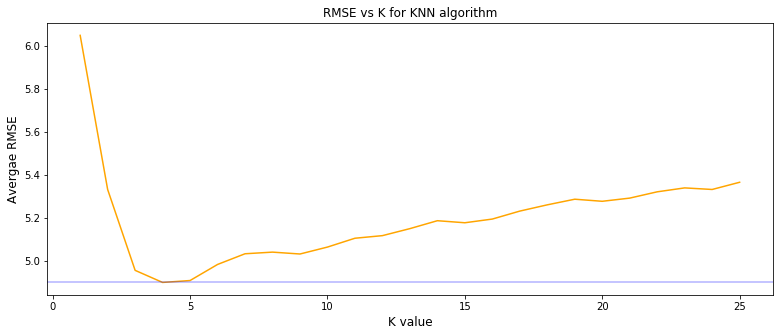

In [33]:
# Plotting average RMSE v/s K
plt.figure(figsize=(13,5))
plot = plt.plot( i,rmse_values, color = 'orange')
plt.axhline(y = min(rmse_values), c = 'b', alpha = 0.3)
plt.title('RMSE vs K for KNN algorithm')
plt.xlabel('K value')
plt.ylabel('Avergae RMSE')
plt.show()

We see that initially, RMSE decreases as K increases but later,it increases with K. Therefore,the best value for k would be 5, since it has the lowest RMSE. 

### Extra-Credit: Forward selection

Thus far the choice of predictor variables has been rather arbitrary. For extra credit, implement a basic [forward selection](http://www.stat.ubc.ca/~rollin/teach/643w04/lec/node41.html) algorithm to progressively include features that decrease the cross-validated RMSE of the model. Note that the optimal value of K may be different for each model, so you may want to use cross-validation to choose K each time (but it is also fine if you fix K at the optimal value from 2.7).  Create a graph that shows RMSE as a function of the number of features in the model. Label each point on the x-axis with the name of the feature that is added at that step in the forward selection algorithm. *(For instance, if the optimal single-feature model has CRIM with RMSE = 10, and the optimal two-feature model has CRIM+ZN with RMSE=9, the first x-axis label will say CRIM and the second x-axis lable with say ZN)*